In [1]:

import numpy as np, pandas as pd, itertools, matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import os
dir = os.path.abspath(os.path.join(os.path.dirname('__file__'), '..'))

In [2]:
df = pd.read_csv(dir+'/source/news.csv')

df.shape
#df.head()
labels = df.label
#labels.head()

In [3]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size = 0.1, random_state = 7)

tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

pac = PassiveAggressiveClassifier(max_iter=200)
pac.fit(tfidf_train,y_train)
y_pred=pac.predict(tfidf_test)

score = accuracy_score(y_test,y_pred)
accuracy = str(round(score*100, 2))+str('%')

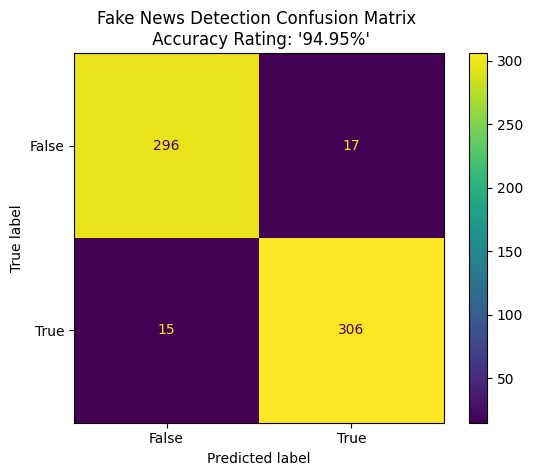

In [4]:
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.title(f"Fake News Detection Confusion Matrix \n Accuracy Rating: %a" %accuracy)
plt.show()